<a href="https://colab.research.google.com/github/marcusnk237/Image-Classification/blob/main/Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Chargement des bibliothèques et Framework
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [ ]:
#Decompression du Dataset
!unzip Dataset.zip

In [ ]:
#Extraction des classes de tumeur

classes = os.listdir('../input/tumor-classes/Dataset/Test')
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]


In [ ]:
#Classement des données (d'entrainement) suivant leur catégories
trainData = []
trainLabel = []
dim = (150, 150)
trainPath = "../input/tumor-classes/Dataset/Train"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(2870, 4)
print(trainData.shape)
print(trainLabel.shape)

tumeur_hypophysaire
tumeur_hypophysaire
meningiome
meningiome
pas_de_tumeur
pas_de_tumeur
gliome
gliome
(2870, 150, 150, 3)
(2870, 4)


In [ ]:
#Classement des données (de test) suivant leur catégories
testData = []
testLabel = []
dim = (150, 150)
testPath = "../input/tumor-classes/Dataset/Test"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(394, 4)
print(testData.shape)
print(testLabel.shape)

tumeur_hypophysaire
tumeur_hypophysaire
meningiome
meningiome
pas_de_tumeur
pas_de_tumeur
gliome
gliome
(394, 150, 150, 3)
(394, 4)


In [ ]:
#Création de notre réseau de neurones

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))           
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='adam')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [ ]:
#Entrainement de notre réseau de neurones
history = model.fit(trainData, trainLabel,batch_size = 100, epochs = 32, verbose=1,validation_data=(testData, testLabel))

Epoch 1/32
29/29 [==============================] - 1s 30ms/step - loss: 0.3525 - val_loss: 2.9559
Epoch 2/32
29/29 [==============================] - 1s 24ms/step - loss: 0.3519 - val_loss: 2.7145
Epoch 3/32
29/29 [==============================] - 1s 23ms/step - loss: 0.3239 - val_loss: 2.8419
Epoch 4/32
29/29 [==============================] - 1s 23ms/step - loss: 0.3152 - val_loss: 3.6308
Epoch 5/32
29/29 [==============================] - 1s 23ms/step - loss: 0.3041 - val_loss: 3.1866
Epoch 6/32
29/29 [==============================] - 1s 25ms/step - loss: 0.3044 - val_loss: 3.7520
Epoch 7/32
29/29 [==============================] - 1s 25ms/step - loss: 0.3082 - val_loss: 2.4858
Epoch 8/32
29/29 [==============================] - 1s 23ms/step - loss: 0.3012 - val_loss: 3.3635
Epoch 9/32
29/29 [==============================] - 1s 23ms/step - loss: 0.3031 - val_loss: 3.4298
Epoch 10/32
29/29 [==============================] - 1s 23ms/step - loss: 0.3072 - val_loss: 3.5037
Epoch 11/

In [ ]:
#Sauvegarde du modèle
model.save("model.h5")

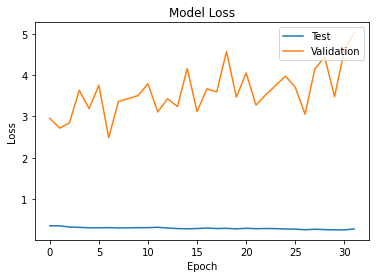

In [ ]:
#Représentation des métriques
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

Classe de la tumeur : meningiome
Certitude : 99.9980092048645%


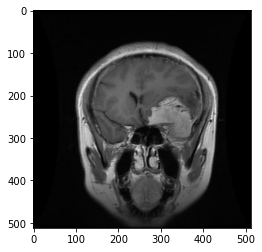

In [ ]:
#Exemple de classificaion
img = Image.open('../input/tumor-classes/Dataset/Test/pas_de_tumeur/image(1).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print('Classe de la tumeur : ' + names(classification))
print('Certitude : '+str(answ[0][classification]*100)+ '%')